<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_ImageProcessingTF/blob/main/IG_SkinCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "ravikanttyagi"
os.environ["KAGGLE_KEY"] = "123e5961bc9d8acdcace3c4bbe10b1e5"

!kaggle datasets download nodoubttome/skin-cancer9-classesisic

100% 783M/786M [00:03<00:00, 241MB/s]
100% 786M/786M [00:03<00:00, 207MB/s]


In [2]:
!unzip skin-cancer9-classesisic.zip

Archive:  skin-cancer9-classesisic.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer 

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# **Exploring Data**

In [4]:
train_path = "dataset/Train"
test_path = "dataset/Test"

In [12]:
class_names = os.listdir(train_path)

In [13]:
class_names

['actinic keratosis',
 'melanoma',
 'basal cell carcinoma',
 'pigmented benign keratosis',
 'dermatofibroma',
 'seborrheic keratosis',
 'nevus',
 'squamous cell carcinoma',
 'vascular lesion']

In [14]:
for name in class_names:
  path = train_path + "/" + name
  n_images = len(os.listdir(path))
  print(name, " : ", n_images)

actinic keratosis  :  114
melanoma  :  438
basal cell carcinoma  :  376
pigmented benign keratosis  :  462
dermatofibroma  :  95
seborrheic keratosis  :  77
nevus  :  357
squamous cell carcinoma  :  181
vascular lesion  :  139


In [15]:
for name in class_names:
  path = test_path + "/" + name
  n_images = len(os.listdir(path))
  print(name, " : ", n_images)

actinic keratosis  :  16
melanoma  :  16
basal cell carcinoma  :  16
pigmented benign keratosis  :  16
dermatofibroma  :  16
seborrheic keratosis  :  3
nevus  :  16
squamous cell carcinoma  :  16
vascular lesion  :  3


In [16]:
random_image = "dataset/Train/dermatofibroma/ISIC_0025314.jpg"

In [17]:
img = cv2.imread(random_image)

In [18]:
img.shape

(450, 600, 3)

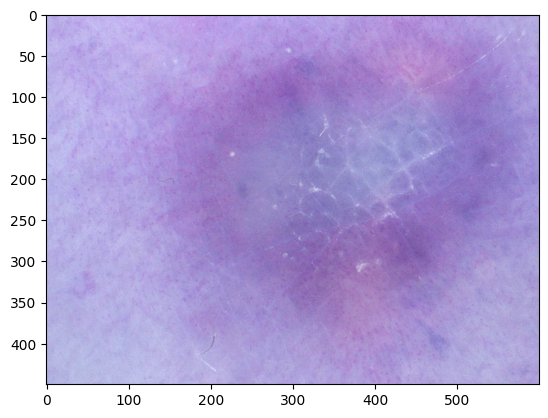

In [19]:
plt.imshow(img)
plt.show()

# **Loading Data - Prepare data**

In [20]:
def load_data(path):
  images_list = []
  labels_list = []
  for i in range(len(class_names)):
    dir_path = path + "/" + class_names[i]
    images = os.listdir(dir_path)
    for j in tqdm(range(len(images))):
      # return path of each image one by one
      img_path = dir_path + "/" + images[j]
      img = cv2.imread(img_path)
      img = cv2.resize(img, (299,299))
      images_list.append(img)
      labels_list.append(i)

  images_list = np.asarray(images_list)
  labels_list = np.asarray(labels_list)
  return images_list, labels_list

In [21]:
train_image, train_labels = load_data(train_path)

100%|██████████| 139/139 [00:01<00:00, 103.27it/s]


In [22]:
train_image.shape

(2239, 299, 299, 3)

In [23]:
test_images, test_labels = load_data(test_path)

100%|██████████| 3/3 [00:00<00:00, 102.05it/s]


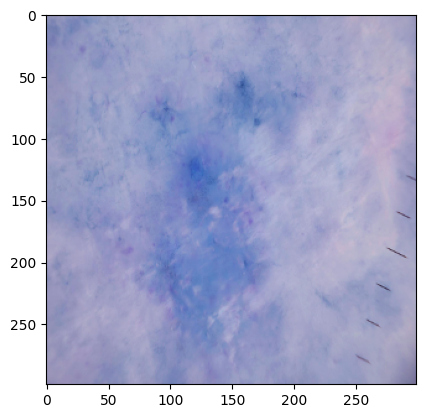

In [24]:
plt.imshow(train_image[564])
plt.show()

# **Data Preprocessing**

In [25]:
train_image[0][0][0]

array([126, 122, 172], dtype=uint8)

In [26]:
# Normalization
train_image, test_images = train_image / 255.0, test_images / 255.0

In [27]:
train_image[0][0][0]

array([0.49411765, 0.47843137, 0.6745098 ])

In [28]:
BUFFER_SIZE = 500
BATCH_SIZE = 32

In [29]:
2239 / 32

69.96875

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Model

In [31]:
train_df = tf.data.Dataset.from_tensor_slices((train_image, train_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_df = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [32]:
train_df

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>